In [1]:
"""
# Se precisar baixar os dados:

import kagglehub

# Download latest version
path = kagglehub.dataset_download("miguelmallqui17/peru-student-enrollment-data-2023")

print("Path to dataset files:", path)
"""

'\n# Se precisar baixar os dados:\n\nimport kagglehub\n\n# Download latest version\npath = kagglehub.dataset_download("miguelmallqui17/peru-student-enrollment-data-2023")\n\nprint("Path to dataset files:", path)\n'

Fonte dos dados: https://www.kaggle.com/datasets/miguelmallqui17/peru-student-enrollment-data-2023?select=peru_student_enrollment_data_2023.csv

# Sobre o Conjunto de Dados (traduzido para do inglês, da página no Kaggle)
Este conjunto de dados contém informações de matrículas de estudantes de uma universidade peruana para o ano de 2023. Ele apresenta desafios como valores ausentes e formatação inconsistente, particularmente na representação de gênero (1, 2, M, F, U), o que requer limpeza e transformação dos dados. O conjunto de dados permite uma análise aprofundada das tendências de matrícula, entre outros indicadores.

Descrição:

MATRÍCULA – Tipo de matrícula do estudante:
- Novo: Estudante se matriculando pela primeira vez.
- Rematriculado: Estudante dando continuidade aos estudos sem interrupção.
- Reincorporado: Estudante retornando após um período de inatividade.

PAGAMENTO DE ANUIDADE MARÇO 2022 – Indica se o estudante pagou a mensalidade em março de 2022 (0 = Não, 1 = Sim).

PAGAMENTO DE ANUIDADE MARÇO 2023 – Indica se o estudante pagou a mensalidade em março de 2023 (0 = Não, 1 = Sim).

GÊNERO – Gênero do estudante (M, F, U, 1 ->(M), 2 ->(F)).

PROGRAMA/CURSO – Programa acadêmico ou curso no qual o estudante está matriculado.

TURNO/HORÁRIO – Horário de estudo (Manhã, Tarde, Noite, Misto).

MODALIDADE DE ESTUDO – Modalidade de estudo:

- Presencial: Aulas realizadas em um campus físico.
- Online: Aulas totalmente online.
- Remoto: Aulas online com algumas atividades presenciais.
- A ser determinado: Modalidade de estudo ainda não selecionada.

FAIXA ETÁRIA DO ESTUDANTE MATRICULADO – Faixa etária dos estudantes matriculados.

DEPARTAMENTO – Departamento onde o estudante reside ou estuda.

PROVÍNCIA – Província onde o estudante reside ou estuda.

DISTRITO – Distrito onde o estudante reside ou estuda.

TIPO DE INSTITUIÇÃO DE ENSINO – Tipo de instituição de onde o estudante vem (Escola, Instituto, etc.).

STATUS DA INSTITUIÇÃO – Status da instituição (Pública ou Privada).

BOLSAS DE DESCONTO – Indica se o estudante recebe algum benefício financeiro ou desconto.

NÚMERO DE CURSOS MATRICULADOS – Número de cursos nos quais o estudante está matriculado.

CURSO EM RISCO – Indica se o estudante tem cursos com risco de reprovação.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('peru_student_enrollment_data_2023.csv', sep=';')

def renomear_colunas(df):
  """
  Renomeia as colunas de um DataFrame pandas para a tradução em português.

  Args:
    df: O DataFrame pandas a ser renomeado.

  Returns:
    Um novo DataFrame pandas com as colunas renomeadas.
  """
  nomes_em_ingles = [
      'ENROLLMENT',
      'TUITION PAYMENT MARCH 2022',
      'TUITION PAYMENT MARCH 2023',
      'GENDER',
      'TYPE OF EDUCATIONAL INSTITUTION',
      'EDUCATIONAL INSTITUTION',
      'INSTITUTION STATUS',
      'DEPARTMENT',
      'PROVINCE',
      'DISTRICT',
      'CLASSIFICATION',
      'CAMPUS',
      'FACULTY',
      'PROGRAM/MAJOR',
      'SHIFT/SCHEDULE',
      'BENEFIT DISCOUNTS',
      'STUDY MODE',
      'AGE RANGE OF ENROLLED STUDENT',
      'DISABILITY',
      'NUMBER OF ENROLLED COURSES',
      'AT-RISK COURSE'
  ]

  nomes_em_portugues = [
      'MATRICULA',
      'PAGAMENTO DE ANUIDADE MARÇO 2022',
      'PAGAMENTO DE ANUIDADE MARÇO 2023',
      'GENERO',
      'TIPO DE INSTITUIÇAO DE ENSINO DE ORIGEM',
      'INSTITUIÇAO DE ENSINO DE ORIGEM',
      'STATUS DA INSTITUIÇAO DE ORIGEM',
      'DEPARTAMENTO',
      'PROVINCIA',
      'DISTRITO',
      'CLASSIFICACAO',
      'CAMPUS',
      'FACULDADE',
      'PROGRAMA/CURSO',
      'TURNO/HORARIO',
      'BOLSAS DE DESCONTO',
      'MODALIDADE DE ENSINO',
      'FAIXA ETARIA',
      'DEFICIENCIA',
      'NUMERO DE DISCIPLINAS MATRICULADAS',
      'CURSO EM RISCO'
  ]

  dicionario_de_nomes = dict(zip(nomes_em_ingles, nomes_em_portugues))
  df_renomeado = df.rename(columns=dicionario_de_nomes)
  return df_renomeado

In [4]:
df_traduzido = renomear_colunas(data.copy()) # Usando .copy() para não modificar o DataFrame original inplace

# Configura para exibir todas as colunas
pd.set_option('display.max_columns', None)

df_traduzido

,MATRICULA,PAGAMENTO DE ANUIDADE MARÇO 2022,PAGAMENTO DE ANUIDADE MARÇO 2023,GENERO,TIPO DE INSTITUIÇAO DE ENSINO DE ORIGEM,INSTITUIÇAO DE ENSINO DE ORIGEM,STATUS DA INSTITUIÇAO DE ORIGEM,DEPARTAMENTO,PROVINCIA,DISTRITO,CLASSIFICACAO,CAMPUS,FACULDADE,PROGRAMA/CURSO,TURNO/HORARIO,BOLSAS DE DESCONTO,MODALIDADE DE ENSINO,FAIXA ETARIA,DEFICIENCIA,NUMERO DE DISCIPLINAS MATRICULADAS,CURSO EM RISCO
0,Nuevo,0,0,M,INSTITUTO,IDAT,PRIVADA,LIMA,LIMA,BRENA,Carreras Pregrado,UTP Lima Centro,Fac. Ing. Sist. Y Elect.,ING. DE REDES Y COMUNICACIONES,MIXTO,SIN BENEFICIO,Presencial,5. >=30,No,0,0
1,Nuevo,1,0,M,COLEGIO,COLEGIO SISE,PRIVADA,LIMA,LIMA,VILLA MARIA DEL TRIUNFO,Carreras Pregrado,UTP Lima Centro,Fac. Ing. Sist. Y Elect.,ING. DE SISTEMAS,NOCHE,SIN BENEFICIO,Presencial,4. 24-29,No,3,0
2,Nuevo,1,1,F,NaN,NaN,NaN,LIMA,LIMA,JESUS MARIA,Carreras Pregrado,UTP Lima Centro,Fac. Der. Cienc. Polit. Y RRII,DERECHO,NOCHE,SIN BENEFICIO,Presencial,4. 24-29,No,1,0
3,Nuevo,0,0,F,COLEGIO,1220 SAN JOSE MARELLO,ESTATAL,LIMA,LIMA,ATE,Carreras Pregrado 50-50,UTP Lima Centro,Fac. Adm. Y Neg.,ADMINISTRACION DE NEGOCIOS (50/50),NOCHE,SIN BENEFICIO,Presencial,4. 24-29,No,0,0
4,Nuevo,1,1,F,INSTITUTO,IDAT,PRIVADA,LIMA,LIMA,SURQUILLO,Carreras Pregrado,UTP Lima Centro,Fac. Adm. Y Neg.,ADM. DE NEGOCIOS INTERNACIO,MAÑANA,CONVENIOS,Presencial,4. 24-29,No,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37577,Reinscrito,1,1,F,NaN,UNIVERSIDAD,NaN,AREQUIPA,AREQUIPA,CAYMA,Carreras Pregrado Virtual,UTP Virtual,Fac. Hum y CC Soc,PSICOLOGIA (VIRTUAL),MIXTO,SIN BENEFICIO,Virtual,5. >=30,No,2,0
37578,Reinscrito,1,1,F,NaN,NaN,NaN,LIMA,LIMA,LURIGANCHO,Carreras Pregrado Virtual,UTP Virtual,Fac. Hum y CC Soc,PSICOLOGIA (VIRTUAL),MIXTO,SIN BENEFICIO,Virtual,5. >=30,No,3,0
37579,Reinscrito,1,1,F,NaN,NaN,NaN,LIMA,LIMA,LIMA,Carreras Pregrado Virtual,UTP Virtual,Fac. Adm. Y Neg.,ADM. DE EMPRESAS (VIRTUAL),NOCHE,SIN BENEFICIO,Virtual,5. >=30,No,3,0
37580,Reinscrito,1,1,M,UNIVERSIDAD,PONTIFICIAUNIVERSIDADCATÓLIC,PRIVADA,LIMA,LIMA,CHORRILLOS,Carreras Pregrado Virtual,UTP Virtual,Fac. Ing. Ind. Y Mec.,ING. INDUSTRIAL (VIRTUAL),MIXTO,SIN BENEFICIO,Virtual,5. >=30,No,3,0


In [5]:
print("\nData info:")
df_traduzido.info()


Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37582 entries, 0 to 37581
Data columns (total 21 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   MATRICULA                                37582 non-null  object
 1   PAGAMENTO DE ANUIDADE MARÇO 2022         37582 non-null  int64 
 2   PAGAMENTO DE ANUIDADE MARÇO 2023         37582 non-null  int64 
 3   GENERO                                   37580 non-null  object
 4   TIPO DE INSTITUIÇAO DE ENSINO DE ORIGEM  15868 non-null  object
 5   INSTITUIÇAO DE ENSINO DE ORIGEM          18212 non-null  object
 6   STATUS DA INSTITUIÇAO DE ORIGEM          15868 non-null  object
 7   DEPARTAMENTO                             36846 non-null  object
 8   PROVINCIA                                36846 non-null  object
 9   DISTRITO                                 36846 non-null  object
 10  CLASSIFICACAO                            37581

In [6]:
# Valores faltantes:
print("\nValores faltantes:")
print(df_traduzido.isnull().sum())


Valores faltantes:
MATRICULA                                      0
PAGAMENTO DE ANUIDADE MARÇO 2022               0
PAGAMENTO DE ANUIDADE MARÇO 2023               0
GENERO                                         2
TIPO DE INSTITUIÇAO DE ENSINO DE ORIGEM    21714
INSTITUIÇAO DE ENSINO DE ORIGEM            19370
STATUS DA INSTITUIÇAO DE ORIGEM            21714
DEPARTAMENTO                                 736
PROVINCIA                                    736
DISTRITO                                     736
CLASSIFICACAO                                  1
CAMPUS                                         0
FACULDADE                                      1
PROGRAMA/CURSO                                 1
TURNO/HORARIO                                 58
BOLSAS DE DESCONTO                             0
MODALIDADE DE ENSINO                           0
FAIXA ETARIA                                   4
DEFICIENCIA                                    0
NUMERO DE DISCIPLINAS MATRICULADAS             0


In [7]:
# Descartar Colunas com NaN demais:
df_traduzido = df_traduzido.drop(['TIPO DE INSTITUIÇAO DE ENSINO DE ORIGEM','INSTITUIÇAO DE ENSINO DE ORIGEM','STATUS DA INSTITUIÇAO DE ORIGEM'], axis=1)
# data = data.drop(['TYPE OF EDUCATIONAL INSTITUTION','EDUCATIONAL INSTITUTION','INSTITUTION STATUS'], axis=1)

# Deletando linhas com NaN:
df_traduzido = df_traduzido.dropna()
# data = data.dropna()

In [8]:
# Avalinado o problema de "GENERO":
df_traduzido['GENERO'].value_counts()

GENERO
M    20555
F    15892
U      200
2       85
1       52
Name: count, dtype: int64

In [9]:
df = df_traduzido # Backup

# Identificar valores únicos
print("\nValores únicos na coluna 'GENERO':", df['GENERO'].unique())

# Mapear correção
genero_mapping = {
    1: 'M',
    '1': 'M',
    2: 'F',
    '2': 'F',
    'M': 'M',
    'F': 'F',
    'U': 'U'
}

# Aplicar correção:

df['GENERO'] = df['GENERO'].map(genero_mapping)

# Valores únicos após correção:
print("\nValores únicos na coluna 'GENERO' após correção:", df['GENERO'].unique())


Valores únicos na coluna 'GENERO': ['M' 'F' 'U' '2' '1']

Valores únicos na coluna 'GENERO' após correção: ['M' 'F' 'U']


In [10]:
# Mostrando os valores únicos de cada coluna para que possamos analisar:

for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print("-" * 30)

Unique values in column 'MATRICULA':
['Nuevo' 'Reincorporado' 'Reinscrito']
------------------------------
Unique values in column 'PAGAMENTO DE ANUIDADE MARÇO 2022':
[0 1]
------------------------------
Unique values in column 'PAGAMENTO DE ANUIDADE MARÇO 2023':
[0 1]
------------------------------
Unique values in column 'GENERO':
['M' 'F' 'U']
------------------------------
Unique values in column 'DEPARTAMENTO':
['LIMA' 'CALLAO' 'AMAZONAS' 'ICA' 'AREQUIPA' 'SAN MARTIN' 'JUNIN'
 'LA LIBERTAD' 'HUANUCO' 'AYACUCHO' 'ANCASH' 'PASCO' 'CUSCO' 'LAMBAYEQUE'
 'HUANCAVELICA' 'PIURA' 'CAJAMARCA' 'APURIMAC' 'PUNO' 'UCAYALI'
 'MADRE DE DIOS' 'LORETO' 'TACNA' 'MOQUEGUA' 'TUMBES']
------------------------------
Unique values in column 'PROVINCIA':
['LIMA' 'CALLAO' 'RODRIGUEZ DE MENDOZA' 'CHINCHA' 'CAYLLOMA' 'SAN MARTIN'
 'CANETE' 'YAULI' 'NAZCA' 'HUAURA' 'TRUJILLO' 'HUANCAYO' 'HUANUCO'
 'BARRANCA' 'ICA' 'HUAROCHIRI' 'CANTA' 'OYON' 'VICTOR FAJARDO' 'AREQUIPA'
 'HUAMANGA' 'SANTA' 'PARINACOCHAS' 'OX

In [11]:
# Lidar com variáveis categóricas
""" df = pd.get_dummies(data, columns=['DEPARTMENT',
                                     'PROVINCE',
                                     'DISTRICT',
                                     'GENDER',
                                     'DISABILITY',
                                     'STUDY MODE',
                                     'SHIFT/SCHEDULE',
                                     'PROGRAM/MAJOR',
                                     'ENROLLMENT',
                                     'CLASSIFICATION',
                                     'CAMPUS',
                                     'FACULTY',
                                     'AGE RANGE OF ENROLLED STUDENT',
                                     'BENEFIT DISCOUNTS'], 
                                     drop_first=True) # drop_first=True to avoid multicollinearity"""

df = pd.get_dummies(df, columns=['DEPARTAMENTO',
                                    'PROVINCIA',
                                    'DISTRITO',
                                    'GENERO',
                                    'DEFICIENCIA',
                                    'MODALIDADE DE ENSINO',
                                    'TURNO/HORARIO',
                                    'PROGRAMA/CURSO',
                                    'MATRICULA',
                                    'CLASSIFICACAO',
                                    'CAMPUS',
                                    'FACULDADE',
                                    'FAIXA ETARIA',
                                    'BOLSAS DE DESCONTO'], 
                                    drop_first=True)      

In [12]:
# Converte explicitamente as colunas dummy para o tipo inteiro (em vez de booleano)

for col in df.columns:
    if df[col].dtype == 'bool':
        df[col] = df[col].astype(int)

In [13]:
# Mostrando os valores únicos de cada coluna para que possamos verificar as mudanças:
""" Pelo output ser muito longo, comentamos esse, mas se necessário, descomentar.
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print("-" * 30) """

' Pelo output ser muito longo, comentamos esse, mas se necessário, descomentar.\nfor column in df.columns:\n    unique_values = df[column].unique()\n    print(f"Unique values in column \'{column}\':")\n    print(unique_values)\n    print("-" * 30) '


Distribuição de PAGAMENTO DE ANUIDADE MARÇO 2023:
PAGAMENTO DE ANUIDADE MARÇO 2023
1    30993
0     5791
Name: count, dtype: int64 PAGAMENTO DE ANUIDADE MARÇO 2023
1    0.842567
0    0.157433
Name: proportion, dtype: float64


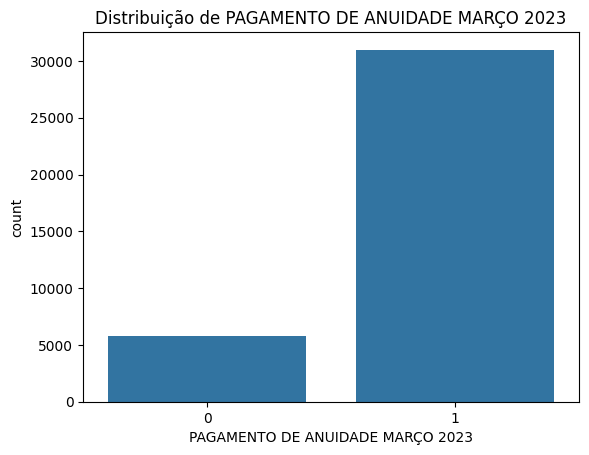

In [14]:
# Verificar a distribuição da variável alvo ('PAGAMENTO DE ANUIDADE MARÇO 2023')
print("\nDistribuição de PAGAMENTO DE ANUIDADE MARÇO 2023:")
print(df['PAGAMENTO DE ANUIDADE MARÇO 2023'].value_counts(), df['PAGAMENTO DE ANUIDADE MARÇO 2023'].value_counts(normalize=True))
sns.countplot(x='PAGAMENTO DE ANUIDADE MARÇO 2023', data=df)
plt.title('Distribuição de PAGAMENTO DE ANUIDADE MARÇO 2023')
plt.show()

Dividindo dados de treino e dados de teste

In [15]:
data = df
del df 

# Separate features (X) and target (y)
X = data.drop('PAGAMENTO DE ANUIDADE MARÇO 2023', axis=1)
y = data['PAGAMENTO DE ANUIDADE MARÇO 2023']

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split data into training and testing sets (already done in the previous step)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nFormato das características de treinamento após o processamento e escalonamento:", X_train_scaled.shape)
print("Formato das características de treinamento após o processamento e escalonamento:", X_test_scaled.shape)


Formato das características de treinamento após o processamento e escalonamento: (29427, 1012)
Formato das características de treinamento após o processamento e escalonamento: (7357, 1012)


Seleção e treino de modelo

In [17]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression(random_state=42)
logistic_regression.fit(X_train_scaled, y_train)
y_pred_lr = logistic_regression.predict(X_test_scaled)
y_pred_proba_lr = logistic_regression.predict_proba(X_test_scaled)[:, 1]

In [18]:
# Avaliar performance:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print("Regressão Logística:")
print("Acurácia:", accuracy_score(y_test, y_pred_lr))
print("Precisão:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("F1-Score:", f1_score(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, y_pred_proba_lr))
print("-" * 30)

Regressão Logística:
Acurácia: 0.9802908794345522
Precisão: 0.9783501896333755
Recall: 0.998709469269237
F1-Score: 0.9884250019956893
ROC AUC: 0.9574768452541651
------------------------------


In [19]:
# Para ver todos coeficientes da célula abaixo, descomentar a linha seguinte: 
# pd.set_option('display.max_rows', None) 

# Para desfazer a linha anterior:
# pd.reset_option('display.max_rows') # Optional: Reset to default after printing

In [20]:
# Checking up for coefficients:
coefficients = logistic_regression.coef_[0]
feature_names = X_train.columns 

# Create a DataFrame to display coefficients with feature names
coefficients_df = pd.DataFrame({'Variável': feature_names, 'Coeficiente': coefficients})
coefficients_df = coefficients_df.sort_values(by='Coeficiente', ascending=False)
print("Coeficiente de Regressão Logística:")
print(coefficients_df)

Coeficiente de Regressão Logística:
                             Variável  Coeficiente
0    PAGAMENTO DE ANUIDADE MARÇO 2022     4.884359
977              MATRICULA_Reinscrito     0.464686
592               DISTRITO_PACHACAMAC     0.304888
452                     DISTRITO_JAEN     0.290828
54                   PROVINCIA_CANETE     0.290578
..                                ...          ...
988              CAMPUS_UTP Lima Este    -0.212129
229                 DISTRITO_AYACUCHO    -0.212675
70                  PROVINCIA_CHINCHA    -0.237208
884                          GENERO_M    -0.237754
2                      CURSO EM RISCO    -0.331830

[1012 rows x 2 columns]


In [21]:
# Obter intercepto
intercept = logistic_regression.intercept_[0]
print(f"\nIntercepto de de Regressão Logística: {intercept:.4f}")


Intercepto de de Regressão Logística: 2.5973
